In [148]:
import pandas as pd
import numpy as np
import random
from sklearn.metrics import f1_score

In [2]:
bach_cont = pd.read_csv("bachelor-contestants.csv")
ette_cont = pd.read_csv("bachelorette-contestants.csv")

In [242]:
elim_data = pd.read_csv('bachelorette_538.csv')
# remove first line, which is just the header info repeated
elim_data = elim_data.drop([0])

# need to change from wide form data to long form data
# want it to be:
# SHOW, SEASON, CONTESTANT, 'TYPE', 'VALUE'
# with 'TYPE' as the current column names
elim1 = pd.melt(elim_data, id_vars=['SHOW', 'SEASON', 'CONTESTANT'])

# rename variable and value
elim1.columns = ['SHOW', 'SEASON', 'CONTESTANT', 'TYPE', 'VALUE']

# split TYPE variable
elim1[['ELIM_DATE', 'NUMBER']] = elim1['TYPE'].str.split('-',expand=True)

#convert NUMBER to numeric
pd.to_numeric(elim1['NUMBER'])
elim1.head()

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1
1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1
2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1
3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1
4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1


In [5]:
elim1.columns

Index(['SHOW', 'SEASON', 'CONTESTANT', 'TYPE', 'VALUE', 'ELIM_DATE', 'NUMBER'], dtype='object')

In [6]:
elim1.VALUE.unique()

array(['R1', nan, 'E', '1', 'EQ', 'EF', 'EU', 'R', '2', 'ED', '3', '4',
       '5', '6', 'W', '7', '8', '9', '10', 'D9', 'D6', 'D5', 'D1', 'D10',
       'D8', 'D7', 'D14', 'D13', 'D12', 'D11', 'D15', 'D6, D12',
       'D1, D12', 'D4', 'D2', 'D3'], dtype=object)

In [15]:
elim1[(elim1.VALUE == 'W') & (elim1.SHOW == 'Bachelorette')]

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
4925,Bachelorette,01,01_RYAN_S,ELIMINATION-6,W,ELIMINATION,6
5819,Bachelorette,02,02_IAN_M,ELIMINATION-7,W,ELIMINATION,7
6687,Bachelorette,04,04_JESSE_C,ELIMINATION-8,W,ELIMINATION,8
6713,Bachelorette,03,03_JERRY_F,ELIMINATION-8,W,ELIMINATION,8
7419,Bachelorette,11,11_SHAWN_B,ELIMINATION-9,W,ELIMINATION,9
8280,Bachelorette,13,13_BRYAN_A,ELIMINATION-10,W,ELIMINATION,10
8312,Bachelorette,12,12_JORDAN_R,ELIMINATION-10,W,ELIMINATION,10
8366,Bachelorette,10,10_JOSH_M,ELIMINATION-10,W,ELIMINATION,10
8392,Bachelorette,09,09_CHRIS_S,ELIMINATION-10,W,ELIMINATION,10
8418,Bachelorette,08,08_JEF_H,ELIMINATION-10,W,ELIMINATION,10


In [254]:
elim1[(elim1.SEASON == '12') & (elim1.SHOW == 'Bachelor')]

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
606,Bachelor,12,12_SHAYNE_L,ELIMINATION-1,NaN,ELIMINATION,1
607,Bachelor,12,12_CHELSEA_W,ELIMINATION-1,NaN,ELIMINATION,1
608,Bachelor,12,12_AMANDA_R,ELIMINATION-1,R1,ELIMINATION,1
609,Bachelor,12,12_NOELLE_D,ELIMINATION-1,NaN,ELIMINATION,1
610,Bachelor,12,12_MARSHANA_R,ELIMINATION-1,NaN,ELIMINATION,1
611,Bachelor,12,12_ROBIN_C,ELIMINATION-1,NaN,ELIMINATION,1
612,Bachelor,12,12_ASHLEE_W,ELIMINATION-1,NaN,ELIMINATION,1
613,Bachelor,12,12_KELLY_D,ELIMINATION-1,NaN,ELIMINATION,1
614,Bachelor,12,12_HOLLY_D,ELIMINATION-1,NaN,ELIMINATION,1
615,Bachelor,12,12_AMY_R,ELIMINATION-1,NaN,ELIMINATION,1


In [107]:
ette13 = elim1[(elim1.SEASON == '13') & (elim1.SHOW == 'Bachelorette')]
ette13.head(31)

,SHOW,SEASON,CONTESTANT,TYPE,VALUE,ELIM_DATE,NUMBER
0,Bachelorette,13,13_BRYAN_A,ELIMINATION-1,R1,ELIMINATION,1
1,Bachelorette,13,13_PETER_K,ELIMINATION-1,NaN,ELIMINATION,1
2,Bachelorette,13,13_ERIC_B,ELIMINATION-1,NaN,ELIMINATION,1
3,Bachelorette,13,13_DEAN_U,ELIMINATION-1,NaN,ELIMINATION,1
4,Bachelorette,13,13_ADAM_G,ELIMINATION-1,NaN,ELIMINATION,1
5,Bachelorette,13,13_MATT_M,ELIMINATION-1,NaN,ELIMINATION,1
6,Bachelorette,13,13_ALEX_B,ELIMINATION-1,NaN,ELIMINATION,1
7,Bachelorette,13,13_WILL_G,ELIMINATION-1,NaN,ELIMINATION,1
8,Bachelorette,13,13_KENNY_L,ELIMINATION-1,NaN,ELIMINATION,1
9,Bachelorette,13,13_ANTHONY_B,ELIMINATION-1,NaN,ELIMINATION,1


In [79]:
#function returns name of random person from input contestant list
def randbaseline(cont_list):
    num_cont = len(cont_list)
    ran_cont_list = random.sample(cont_list, len(cont_list)) #shuffles input list
    win_num = random.randint(0,num_cont-1) #set seed??
    return ran_cont_list[win_num]
    

In [137]:
#function returns the updated contestant list after elimination occurs
def getcont(week,cont_list,data):
    numelim = 'ELIMINATION-' + week
    elim = data[(data.TYPE == numelim) & ((data.VALUE == 'E')|(data.VALUE == 'EU')|(data.VALUE == 'ED')|
       (data.VALUE == 'EF'))].CONTESTANT.values
    new_cont_list = cont_list.copy()
    new_cont_list = [elem for elem in new_cont_list if elem not in elim ]
    return new_cont_list
    
    

In [261]:
#*****add in option bach/ette option
#input season, data
def baselinemodel(season_num, show, data): #data == elim1
    if show == "Bachelor":
        subset = data[(data.SEASON == str(season_num)) & (data.SHOW == 'Bachelor')]
        if season_num == '11':
            return (0,0,0)
    elif show == "Bachelorette":
        subset = data[(data.SEASON == str(season_num)) & (data.SHOW == 'Bachelorette')]
    else: 
        return ("Not a Show Option")
    elimrounds = subset.NUMBER.max()
    
    w1_cont = pd.unique(subset.CONTESTANT) #select list of starting contestants
    w1_cont = [name for name in w1_cont if str(name) != 'nan'] #remove nan
    w1_cont_ID = {} #dictionary that contains numerical ID for contestants
    ID = 0
    for name in w1_cont:
        w1_cont_ID[name] = ID
        ID += 1
    
    winner = subset[subset.VALUE == 'W'].CONTESTANT.values
    winner_lst =[]
    for win in winner:
        break
    winner_lst = [w1_cont_ID[win]] * (int(elimrounds)+1)
    
    elimdict = {}
    contlist = w1_cont
    elimdict[1] = contlist
    #loops through each elimination week and creates a dict of the updated contestant lists
    for week in range(1,int(elimrounds)+1): 
        elimdict[week+1] = getcont(str(week),contlist,subset)
        contlist = elimdict[week+1]
        
    pred_winner_dict = {}
    for key in elimdict.keys():
        pred_winner_dict[key] = randbaseline(elimdict[key])
        
    pred_winner = []
    for key in pred_winner_dict.keys():
        pred_winner.append(w1_cont_ID[pred_winner_dict[key]])
        
    F1score = f1_score(winner_lst, pred_winner, average='micro')
    
    return (pred_winner_dict, winner, F1score)
    
    
    
#return predicted winner for each week, winner, f1score

In [245]:
scoredict_ette = {}
seasonlist_ette = ['01', '02','03','04','05','06','07','08','09','10','11','12','13']
i=1
for season in seasonlist_ette:
    scoredict_ette[i] = baselinemodel(season,'Bachelorette',elim1)
    i+=1
len(scoredict_ette)

13

In [262]:
scoredict_bach = {}
seasonlist_bach = ['01', '02','03','04','05','06','07','08','09','10','11','12','13',
                   '14','15','16','17','18','19','20','21']
i=1
for season in seasonlist_bach:
    scoredict_bach[i] = baselinemodel(season,'Bachelor',elim1)
    i+=1
len(scoredict_bach)

21

In [276]:
# for key in scoredict_ette.keys():
#     print(key,scoredict_ette[key][2])
ettescore = pd.DataFrame.from_dict(scoredict_ette, orient = "index")
ettescore.columns = ['predictions','seasonwinner','F1Score']
ettescore.head()

,predictions,seasonwinner,F1Score
1,"{1: '01_DUANE_X', 2: '01_BROOK_X', 3: '01_RYAN...",[01_RYAN_S],0.4
2,"{1: '02_TREVER_X', 2: '02_ELIOT_X', 3: '02_SEA...",[02_IAN_M],0.4
3,"{1: '03_CHRIS_M', 2: '03_RYAN_SH', 3: '03_JOSH...",[03_JERRY_F],0.2
4,"{1: '04_PATRICK_D', 2: '04_JASON_M', 3: '04_BR...",[04_JESSE_C],0.3
5,"{1: '05_JOHN_H', 2: '05_MARK_H', 3: '05_ED_S',...",[05_ED_S],0.3


In [277]:
# for key in scoredict_bach.keys():
#     print(key,scoredict_bach[key][2])
bachscore = pd.DataFrame.from_dict(scoredict_bach, orient = "index")
bachscore.columns = ['predictions','seasonwinner','F1Score']
bachscore.head()

,predictions,seasonwinner,F1Score
1,"{1: '01_ALEXA_X', 2: '01_ANGELIQUE_X', 3: '01_...",[01_AMANDA_M],0.5
2,"{1: '02_LIANGY_X', 2: '02_HEATHER_C', 3: '02_H...",[02_HELENE_E],0.4
3,"{1: '03_SHANNON_X', 2: '03_AUDREE_X', 3: '03_J...",[03_JEN_X],0.5
4,"{1: '04_Shea', 2: '04_Jenny', 3: '04_Jenny', 4...",[04_Estella],0.3
5,"{1: '05_DESHAUN_W', 2: '05_TARA_H', 3: '05_JES...",[05_JESSICA_B],0.4


In [269]:
import seaborn as sns

In [281]:
bachscore.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21],
           dtype='int64')

In [287]:
bachscore.F1score

AttributeError: 'DataFrame' object has no attribute 'F1score'

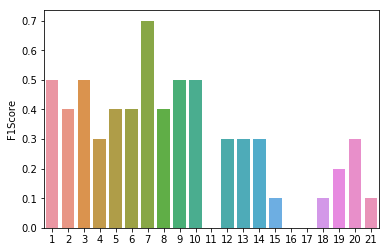

In [288]:
sns.barplot(x=bachscore.index, y=bachscore.F1Score)

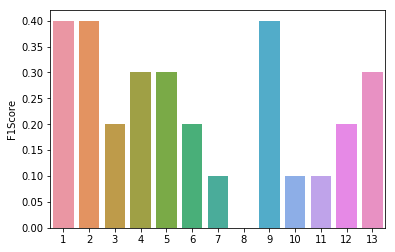

In [289]:
sns.barplot(x=ettescore.index, y=ettescore.F1Score)

In [247]:
scoredict_ette[1][2]

0.4000000000000001

In [220]:
baselinemodel(11,elim1)

({1: '11_DANIEL_F',
  2: '11_CORY_S',
  3: '11_JOE_B',
  4: '11_JUSTIN_R',
  5: '11_BEN_H',
  6: '11_CHRIS_S',
  7: '11_IAN_T',
  8: '11_NICK_V',
  9: '11_BRADY_T',
  10: '11_BRADY_T'},
 array(['11_SHAWN_B'], dtype=object),
 0.0)